# Name: Tejveer Singh
# Matriculation Number : 11010863

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

C:\Users\11010863\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
data  = pd.read_csv("sha256_family.csv")
data.head()

,sha256,family
0,090b5be26bcc4df6186124c2b47831eb96761fcf61282d...,Plankton
1,bedf51a5732d94c173bcd8ed918333954f5a78307c2a2f...,DroidKungFu
2,149bde78b32be3c4c25379dd6c3310ce08eaf58804067a...,Plankton
3,dd11c105ec8bb3c851f5955fa53eebb91b7dc46bef4d91...,GinMaster
4,6832234c4eae7a57be4f68271b7eecb056c4cd8352c67d...,FakeDoc


In [3]:
X = data['sha256']
Y = data['family']


S1 = ["feature"]
S2 = ["permission"]
S3 = ["activity","service_revceiver","service","provider"]
S4 = ["intent"]
S5 = ["api_call"]
S6 = ["real_permission"]
S7 = ["call"]
S8 = ["url"]



<p> What i did here is i seprate the X and Y values where X is input data and Y is label </p>
<p> S1,S2....S8 are the features </p>

In [4]:
def make_dataset(d_data,feature,name):
    if d_data in feature:
                    if dict_.get(name) ==None:
                        dict_[name] = 1
                    else:
                        dict_[name] = dict_.get(name) + 1
    

In [5]:
folder = "feature_vectors/"
dict_  = {}
temp = []
for file_name in X:
    dict_ = {}
    with open(folder+''+file_name,'r') as fp:
        try:
            for line in fp:
                splitted_data = line.split("::")
                
                #Creating the data set from features 
                make_dataset(splitted_data[0],S1,"S1")
                make_dataset(splitted_data[0],S2,"S2")
                make_dataset(splitted_data[0],S3,"S3")
                make_dataset(splitted_data[0],S4,"S4")
                make_dataset(splitted_data[0],S5,"S5")
                make_dataset(splitted_data[0],S6,"S6")
                make_dataset(splitted_data[0],S7,"S7")
                make_dataset(splitted_data[0],S8,"S8")                    
                
            temp.append(dict_)
                   
                
        except:
            continue
    


<b> How I am making the dataset ?</b>
    <p> I am using different approach basically what i am doing is , I am counting the number of time 
        the particular feature occur </p>
    <p> than I am coverting it to data frame </p>
    <p> So I am reading the .csv file and for every row in the csv file we have the file name which represent one of the file in the feature vector so i am opening the file and  sending it to make_dataset function which is doing all the counting 
        logic</p>

<h1>#lets make the data set </h1>
    <b> So I have my dictionary inside the list now i need to put them in dataframe , they will convert it to 
        Standard DataFrame </b>

In [6]:

malware_data  = pd.DataFrame(temp)
malware_data  = pd.concat([malware_data,Y],axis=1)


<b>
    <ol>
        <li>As we can see below that most of the value are null</li>
        <li>what we will do is the feature more than 20 % of the value NAN we will remove that feature</li> 
        

</b>

In [7]:
malware_data.isnull().sum()


S1          36
S2          50
S3         106
S4          36
S5         149
S6         156
S7         224
S8        1671
family       0
dtype: int64

<h4>What are we doing here ?</h4>
    <ol> <li> I am Trying to make a new dataFrame of the features which have null values</li>
    <li> Than I am finding the percentage of the feature which have null value </li>

In [8]:
missing_value = malware_data.isnull().sum()
name  = pd.Series(missing_value.keys())
value = pd.Series(missing_value.values)
missing_value_data  = pd.concat([name,value],axis=1)
missing_value_data["percentage_of_missing_data"]  = (missing_value_data[1]/np.sum(missing_value_data[1]))*100
missing_value_data

,0,1,percentage_of_missing_data
0,S1,36,1.482702
1,S2,50,2.059308
2,S3,106,4.365733
3,S4,36,1.482702
4,S5,149,6.136738
5,S6,156,6.425041
6,S7,224,9.225700
7,S8,1671,68.822076
8,family,0,0.000000


<b>
<ol>
    <li>by looking at this data we can see that most of the value in S8 family is missing, its 68.822%  </li>
    <li>threshold set by us is 20 % and S8 has almost 68 percent missing value </li>
    <li>we can get rid of this column and fill rest of the column with either mean and median </li>
    
   <b/>

In [9]:
malware_data.drop("S8",axis=1,inplace=True) # Dropping the S8 column

<b>
<ol>
    <li>This Function replace the NaN value with median value </li>
    <li>Why median ? </li>
    <li>because it does not get effected with outlier </li>
    </b> 

In [10]:
# function replace NaN with median
def fill_value_with_median(feature_name):
    for name in feature_name:
        median_v = malware_data[name].median()
        malware_data[name].replace(np.nan,median_v,inplace=True)
        
fill_value_with_median(["S1","S2","S3","S4","S5","S6","S7"])

In [11]:
print(malware_data.head())
print("\n")
print("Null Value")
print(malware_data.isnull().sum())


    S1    S2    S3   S4    S5    S6    S7       family
0  6.0  24.0   1.0  4.0  10.0   9.0   5.0     Plankton
1  2.0   7.0   6.0  5.0  10.0   9.0  10.0  DroidKungFu
2  3.0  22.0   1.0  4.0   9.0   8.0   5.0     Plankton
3  7.0  12.0  11.0  4.0  10.0   9.0   9.0    GinMaster
4  4.0  23.0   4.0  7.0  17.0  16.0  10.0      FakeDoc


Null Value
S1        0
S2        0
S3        0
S4        0
S5        0
S6        0
S7        0
family    0
dtype: int64


<h1>Data is ready lets see the data more deeply and try to understand ?</h1>

In [12]:
malware_data.describe() # describe function gives us more information of the data 

,S1,S2,S3,S4,S5,S6,S7
count,5560.000000,5560.000000,5560.000000,5560.000000,5560.000000,5560.000000,5560.000000
mean,3.725899,11.857194,3.671043,4.434532,7.033633,6.208993,6.508094
std,1.915102,7.313559,4.405661,2.582761,3.710584,3.502348,3.426551
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,6.000000,1.000000,2.000000,4.000000,3.000000,4.000000
50%,3.000000,10.000000,2.000000,4.000000,7.000000,6.000000,6.000000
75%,5.000000,17.000000,4.000000,5.000000,10.000000,9.000000,9.000000
max,11.000000,109.000000,56.000000,48.000000,20.000000,19.000000,20.000000


<b>
<ol>
    <li>By looking at this Description of data I can say that No missing value is their in data </li>
    <li>Data Not Seems to be normally distributed </li>
    <li>Their are some outlier present as the difference between min value and max value is more </li>
  </b>

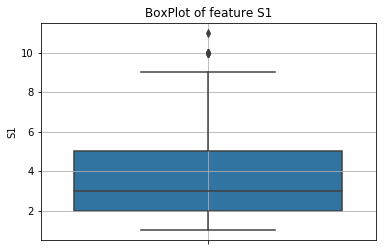

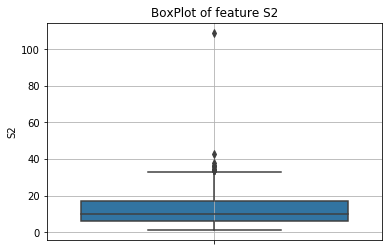

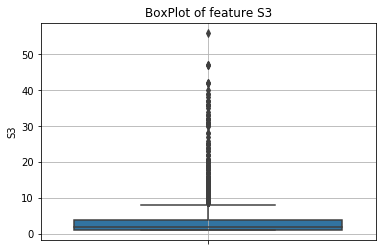

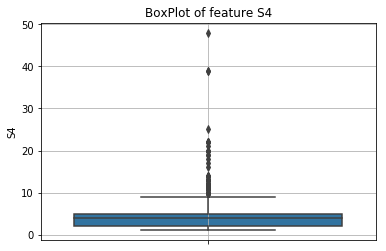

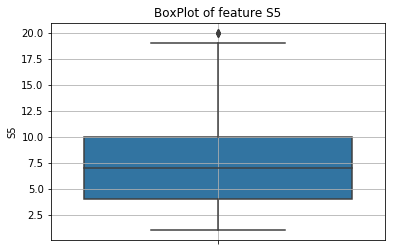

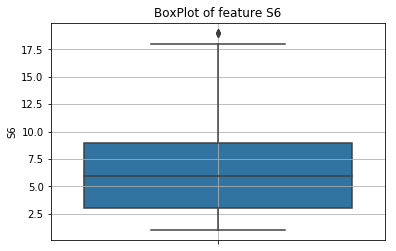

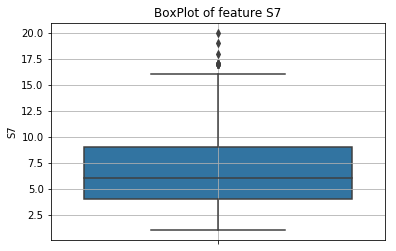

In [13]:
#plotting the data i am using box plot as it gives us additional information like percentile 
for feature_name in malware_data.drop("family",axis=1).columns:
    sb.boxplot(y=malware_data[feature_name])
    plt.grid()
    plt.title("BoxPlot of feature {}".format(feature_name))
    plt.show()


<b>
<ol>
    <li>By looking at the box plot above i can say that S2 S3 S4 S7 have outlier but in order to confirm this</li>
    <li>we can look into the percentile value of all the Feature than we have the clear understanding of what feature is having the outlier</li>
    <li>percentile = (p/100)*n</li>
</b>

In [14]:
#processing of finding the percentile 
# i am applying the formula 
def find_percentile(feature,first):
    
    
    if first=="1":
        for i_ in range(0,100,10):
            val = malware_data[feature]
            val = np.sort(val,axis =None)
            print("Percentile of {} is  {} ".format(i_,val[int(np.float(i_/100)*len(val))]))
    elif first=="2":
        for i_ in range(90,100):
            val = malware_data[feature]
            val = np.sort(val,axis =None)
            print("Percentile of {} is  {} ".format(i_,val[int(np.float(i_/100)*len(val))]))
    elif first == "3":
        for i_ in np.arange(0,1.0,0.1):
            val = malware_data[feature]
            val = np.sort(val,axis =None)
            print("Percentile of {} is  {} ".format(i_+99,val[int(np.float((i_+99)/100)*len(val))]))
    
    print("Percentile of 100 is {}".format(val[-1]))
    

<h1> Explaination about percentile function ? </h1>
<b>
        <ol>
            <li>we have our percentile function ready now we can use this function and find out the outlier</li>
            <li>We have seen in above graph that the outlier are in S2 S3 S4 and S7 </li>
             <li>lets see what is the furthest value in this which is making these feature as an outlier </li>
            <li> what is 1 2 and 3 represent ?</li>
                <ol>
                <li>  basically 1 means i want percentile value between 0,90</li>
                <li>   2 means i want percentile value between 90,100</li>
                <li>   3 means i want percentile value between 99,100</li>


In [15]:

find_percentile("S2","1")
print("-----------------")
find_percentile("S2","2")
print("-----------------")
find_percentile("S2","3")

Percentile of 0 is  1.0 
Percentile of 10 is  1.0 
Percentile of 20 is  1.0 
Percentile of 30 is  1.0 
Percentile of 40 is  1.0 
Percentile of 50 is  1.0 
Percentile of 60 is  1.0 
Percentile of 70 is  1.0 
Percentile of 80 is  1.0 
Percentile of 90 is  1.0 
Percentile of 100 is 109.0
-----------------
Percentile of 90 is  1.0 
Percentile of 91 is  1.0 
Percentile of 92 is  1.0 
Percentile of 93 is  1.0 
Percentile of 94 is  1.0 
Percentile of 95 is  1.0 
Percentile of 96 is  1.0 
Percentile of 97 is  1.0 
Percentile of 98 is  1.0 
Percentile of 99 is  1.0 
Percentile of 100 is 109.0
-----------------
Percentile of 99.0 is  31.0 
Percentile of 99.1 is  31.0 
Percentile of 99.2 is  31.0 
Percentile of 99.3 is  32.0 
Percentile of 99.4 is  32.0 
Percentile of 99.5 is  32.0 
Percentile of 99.6 is  33.0 
Percentile of 99.7 is  34.0 
Percentile of 99.8 is  34.0 
Percentile of 99.9 is  36.0 
Percentile of 100 is 109.0


In [16]:
# As we can  see in this after 99.9 the value jump too high now what i can do is remove the data which is 
# above 36.0 and keep rest 
#lets do it 
malware_data = malware_data[malware_data["S2"]<=36.0]

In [17]:
#lets see rest of the feature 


find_percentile("S3","1")
print("-----------------")
find_percentile("S3","2")
print("-----------------")
find_percentile("S3","3")

Percentile of 0 is  1.0 
Percentile of 10 is  1.0 
Percentile of 20 is  1.0 
Percentile of 30 is  1.0 
Percentile of 40 is  1.0 
Percentile of 50 is  1.0 
Percentile of 60 is  1.0 
Percentile of 70 is  1.0 
Percentile of 80 is  1.0 
Percentile of 90 is  1.0 
Percentile of 100 is 56.0
-----------------
Percentile of 90 is  1.0 
Percentile of 91 is  1.0 
Percentile of 92 is  1.0 
Percentile of 93 is  1.0 
Percentile of 94 is  1.0 
Percentile of 95 is  1.0 
Percentile of 96 is  1.0 
Percentile of 97 is  1.0 
Percentile of 98 is  1.0 
Percentile of 99 is  1.0 
Percentile of 100 is 56.0
-----------------
Percentile of 99.0 is  25.0 
Percentile of 99.1 is  25.0 
Percentile of 99.2 is  30.0 
Percentile of 99.3 is  31.0 
Percentile of 99.4 is  31.0 
Percentile of 99.5 is  32.0 
Percentile of 99.6 is  33.0 
Percentile of 99.7 is  36.0 
Percentile of 99.8 is  37.0 
Percentile of 99.9 is  42.0 
Percentile of 100 is 56.0


In [18]:
# feature S3 seems to be good i think  we can keep all the values of S3 
# beacause at 99.9 their is not a high jump of value 

#lets see rest of the feature 


find_percentile("S4","1")
print("-----------------")
find_percentile("S4","2")
print("-----------------")
find_percentile("S4","3")

Percentile of 0 is  1.0 
Percentile of 10 is  1.0 
Percentile of 20 is  1.0 
Percentile of 30 is  1.0 
Percentile of 40 is  1.0 
Percentile of 50 is  1.0 
Percentile of 60 is  1.0 
Percentile of 70 is  1.0 
Percentile of 80 is  1.0 
Percentile of 90 is  1.0 
Percentile of 100 is 48.0
-----------------
Percentile of 90 is  1.0 
Percentile of 91 is  1.0 
Percentile of 92 is  1.0 
Percentile of 93 is  1.0 
Percentile of 94 is  1.0 
Percentile of 95 is  1.0 
Percentile of 96 is  1.0 
Percentile of 97 is  1.0 
Percentile of 98 is  1.0 
Percentile of 99 is  1.0 
Percentile of 100 is 48.0
-----------------
Percentile of 99.0 is  11.0 
Percentile of 99.1 is  11.0 
Percentile of 99.2 is  11.0 
Percentile of 99.3 is  12.0 
Percentile of 99.4 is  13.0 
Percentile of 99.5 is  13.0 
Percentile of 99.6 is  13.0 
Percentile of 99.7 is  16.0 
Percentile of 99.8 is  20.0 
Percentile of 99.9 is  22.0 
Percentile of 100 is 48.0


In [19]:
#this feature has a outlier because the value at 99.9 is 22.0 which changes to 48.0
# which is the high change of the value 
malware_data = malware_data[malware_data["S4"] <=22.0]

In [20]:
#lets see the last feature


find_percentile("S7","1")
print("-----------------")
find_percentile("S7","2")
print("-----------------")
find_percentile("S7","3")

Percentile of 0 is  1.0 
Percentile of 10 is  1.0 
Percentile of 20 is  1.0 
Percentile of 30 is  1.0 
Percentile of 40 is  1.0 
Percentile of 50 is  1.0 
Percentile of 60 is  1.0 
Percentile of 70 is  1.0 
Percentile of 80 is  1.0 
Percentile of 90 is  1.0 
Percentile of 100 is 20.0
-----------------
Percentile of 90 is  1.0 
Percentile of 91 is  1.0 
Percentile of 92 is  1.0 
Percentile of 93 is  1.0 
Percentile of 94 is  1.0 
Percentile of 95 is  1.0 
Percentile of 96 is  1.0 
Percentile of 97 is  1.0 
Percentile of 98 is  1.0 
Percentile of 99 is  1.0 
Percentile of 100 is 20.0
-----------------
Percentile of 99.0 is  15.0 
Percentile of 99.1 is  15.0 
Percentile of 99.2 is  15.0 
Percentile of 99.3 is  15.0 
Percentile of 99.4 is  15.0 
Percentile of 99.5 is  15.0 
Percentile of 99.6 is  16.0 
Percentile of 99.7 is  16.0 
Percentile of 99.8 is  17.0 
Percentile of 99.9 is  17.0 
Percentile of 100 is 20.0


In [21]:
#this feature is good 
malware_data.describe()

,S1,S2,S3,S4,S5,S6,S7
count,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000
mean,3.722672,11.827301,3.662345,4.408068,7.027733,6.203314,6.501891
std,1.912293,7.179504,4.399819,2.407486,3.707072,3.498648,3.421891
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,6.000000,1.000000,2.000000,4.000000,3.000000,4.000000
50%,3.000000,10.000000,2.000000,4.000000,7.000000,6.000000,6.000000
75%,5.000000,17.000000,4.000000,5.000000,10.000000,9.000000,9.000000
max,11.000000,36.000000,56.000000,22.000000,20.000000,19.000000,20.000000


<h1>Conclusion after applying the percentile function and after removing the outlier </h1>
    <p>
        Now if we see this we can say we have no outlier to best of our knowledge. <br>
        Now the data we have is not normalize it is always a good idea to normalize the data <Br>
        because than we have a range of value which is between 0 and 1 
        how we can do it : we can use sklearn library or do it by ourself 
    </p>

In [22]:
#this is the function that help me to normalize the data the values is between 0 and 1 after normalization
def normalize(data):
    for i in data.drop("family",axis=1).columns:
        min_val = data[i].min()
        max_val = data[i].max()
        data[i] = (data[i] - min_val)/(max_val-min_val)
    
    return data
malware_data = normalize(malware_data)

In [23]:
# Now once we have the normalized data we can look into  analysis of the 
# Each feature and try to analyse if this feature us important or not 

#lets find the correlation matrix of the feature
correlation_matrix  = malware_data.corr()

<h1>Heat Map ||</h1>

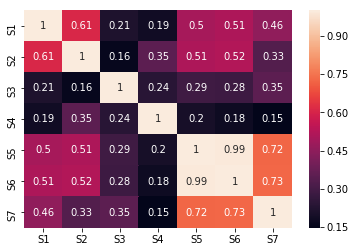

In [24]:
#as we can see that this matrix is correlation matrix to make it more readable 
# lets draw the heat map of the correlation matrix and look into the feature 
sb.heatmap(correlation_matrix,annot=True)
plt.show()

<b>
<ol>
    <li>As we can see that S5 and S6 are highly correlated and since these two feature is pretty similar </li>
    <li>We can remove one  of the feature and use only one because it dont make sense to keep both the feature</li> 
</b>

In [25]:
malware_data.drop("S6",axis=1,inplace=True)
#Thou we can see more feature in this which is correlated with S5 but we will remove only those which is more correlated

<h1> Univariant Analysis</h1>

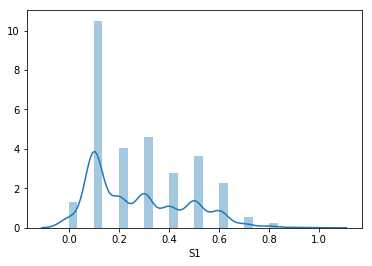

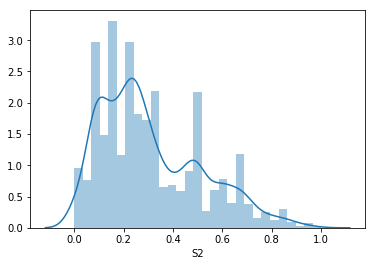

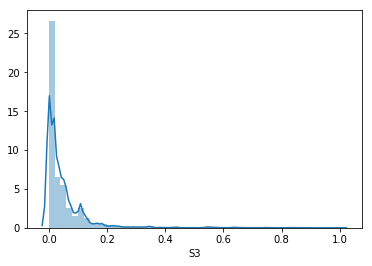

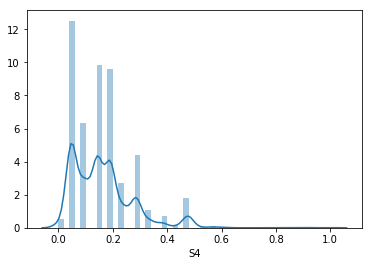

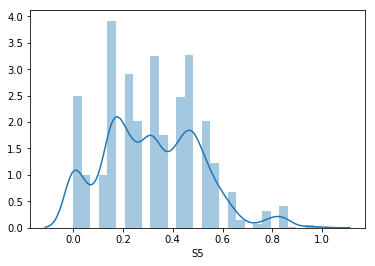

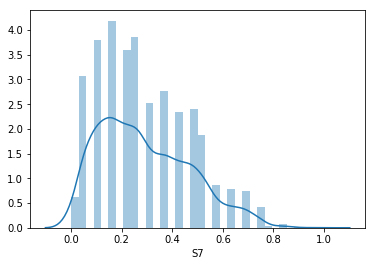

In [26]:
#lets see the univariant analysis of the all the feature 
for name in malware_data.drop("family",axis=1).columns:
    sb.distplot(malware_data[name])
    plt.show()

<b> Plots are not normally distributed
</b>

<h3>What we have to do ? </h3>
<b>
<ol>
<li>classify the family of the virus</li> 
<li>Find the accuracy</li>
<li>precision </li>
<li>recall</li> 
<li>f1 Score 
</l1>
</b>

In [27]:
#lets differentiate the malware and non malware data point so that we find it easy to differentiate among them
malware =  ["Plankton","Geinimi","DroidKungFu","Opfake","FakeInstaller"]
malware_data["family"] = ["malware" if name in malware else "nonmalware" for name in malware_data["family"]]
malware_data.family.value_counts()

malware       2918
nonmalware    2635
Name: family, dtype: int64

In [28]:
#lets convert the family into binary variable which is 1 or 0
malware_data["family"] = [1 if name =="malware" else 0 for name in malware_data["family"]]
malware_data.head()
#data is ready to splitted into train test and cross validation 

,S1,S2,S3,S4,S5,S7,family
0,0.5,0.657143,0.000000,0.142857,0.473684,0.210526,1
1,0.1,0.171429,0.090909,0.190476,0.473684,0.473684,1
2,0.2,0.600000,0.000000,0.142857,0.421053,0.210526,1
3,0.6,0.314286,0.181818,0.142857,0.473684,0.421053,0
4,0.3,0.628571,0.054545,0.285714,0.842105,0.473684,0


In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(malware_data.drop("family",axis=1),malware_data["family"],stratify=malware_data["family"],test_size=0.3)
x_train,x_cv,y_train,y_cv     = train_test_split(x_train,y_train,stratify=y_train,test_size=0.2)

In [30]:
print("Train data have ",x_train.shape)
print("Test data have ",x_test.shape)
print("Cross validation ",x_cv.shape)

('Train data have ', (3109, 6))
('Test data have ', (1666, 6))
('Cross validation ', (778, 6))


<h1> Below is Metric Evaluation Function where we are finding 
    Accuracy Score , F1 Score, Recall Score , Precision Score
</h1>

In [31]:
def metrics_evaluation(y_predict_train,y_predict_test,y_predict_cv):
    # By looking at the train test and cross validation i can say that is not overfitting 
    # lets find the more metrics which is precision recall and f1 score
    #lets see the accuracy for train,test and cross validation
    
    
    
    print("--------------------Accuracy Score -------------------------------")
    print("The accuracy for Train is ",accuracy_score(y_train,y_predict_train))
    print("The accuracy for Test is ",accuracy_score(y_test,y_predict_test))
    print("The accuracy for Cross validation is ",accuracy_score(y_cv,y_predict_cv))

    print("\n")
    print("----------------------F1 Score Result----------------------------------")

    print("The F1.Score for Train is ",f1_score(y_train,y_predict_train))
    print("The F1.Score for Test is ",f1_score(y_test,y_predict_test))
    print("The F1.Score for Cross validation is ",f1_score(y_cv,y_predict_cv))

    print("\n")
    print("---------------------Precision Score-----------------------------------")

    print("The Precision Score for Train is ",precision_score(y_train,y_predict_train))
    print("The Precision Score for Test is ",precision_score(y_test,y_predict_test))
    print("The Precision Score for Cross validation is ",precision_score(y_cv,y_predict_cv))

    print("\n")
    print("---------------------Recall Score --------------------------------------")

    print("The Recall Score for Train is ",recall_score(y_train,y_predict_train))
    print("The Recall Score for Test is ",recall_score(y_test,y_predict_test))
    print("The Recall Score for Cross validation is ",recall_score(y_cv,y_predict_cv))

<h1> First Model Support Vector Machine Classifier </h1>
    <b> What I am Doing in it?   </b>
        <ol> 
            <li> Hyperparameter Tuning using the cross validation data </li>
            <li> Finding Train,test,Cross validation Accuracy </li>
            <li> Finding Train,test,Cross Percision Score </li>
            <li> Finding Train,test,Cross Recall Score </li>
            <li> Finding Train,test,Cross F1 Score </li>
          
 
            
            
   

In [32]:
#lets use Model SVC which is known as Support vector classifier of SVM
# which is basically used for classification problem
cs = [0.1, 1, 10, 100, 1000]
accuracy_score_ = []
for c in cs:
    svc = SVC(C =c)
    svc.fit(x_train,y_train)
    y_predict  = svc.predict(x_cv)
    score = accuracy_score(y_cv,y_predict)
    accuracy_score_.append(score)
    print("Accuracy Score",score)
    

C = cs[accuracy_score_.index(max(accuracy_score_))]
# here we use grid  search technique to find the best value of C 
# which is also call the penalty parameter
print("--------------------------------")

accuracy_score__ = []
kernels = ["linear","rbf", "poly"]
for gm in kernels:
    svc =SVC(C = C, kernel=gm)
    svc.fit(x_train,y_train)
    y_predict  = svc.predict(x_cv)
    score = accuracy_score(y_cv,y_predict)
    accuracy_score__.append(score)
    print("Accuracy Score",score)


kernel  = kernels[accuracy_score__.index(max(accuracy_score__))]


#now we have set what parameter to choose still we can use more hyperparameter to tune
# I took the help of https://medium.com/all-things-ai/in-depth-parameter-tuning-for-svc-758215394769
# In order to tune the paramter 

#lets apply all together and see of this bring some change to our model


svc  = SVC(C =c,kernel=kernel)
svc.fit(x_train,y_train)

y_predict_train =  svc.predict(x_train)
y_predict_test =  svc.predict(x_test)
y_predict_cv =  svc.predict(x_cv)

print("\n")
print("--------------------Metrics F1 Score,Accuracy,Precission and Recall-------------------------------")
print("\n")

metrics_evaluation(y_predict_train,y_predict_test,y_predict_cv)


('Accuracy Score', 0.5205655526992288)
('Accuracy Score', 0.583547557840617)
('Accuracy Score', 0.7532133676092545)
('Accuracy Score', 0.7622107969151671)
('Accuracy Score', 0.7930591259640103)
--------------------------------
('Accuracy Score', 0.6118251928020566)
('Accuracy Score', 0.7930591259640103)
('Accuracy Score', 0.6593830334190232)


--------------------Metrics F1 Score,Accuracy,Precission and Recall-------------------------------


--------------------Accuracy Score -------------------------------
('The accuracy for Train is ', 0.7963975554840785)
('The accuracy for Test is ', 0.7719087635054022)
('The accuracy for Cross validation is ', 0.7930591259640103)


----------------------F1 Score Result----------------------------------
('The F1.Score for Train is ', 0.8101949025487257)
('The F1.Score for Test is ', 0.7835990888382688)
('The F1.Score for Cross validation is ', 0.8076463560334529)


---------------------Precision Score-----------------------------------
('The Precis

<h1> Random Forest Classifier Ensemble Method</h1>
    <p>
    <ol>
          <li>  lets use another model Random Forest classifier basically it is an ensembles model </li>
            <li>the concept is very simple we take Decision tree and use different data to predict the outcome 
            <li>than use aggregation to find the final result </li>
            <li>the problem with decision tree is it can easily overfit so in Random Forest this problem is not their</li>
            <li>lets see how we do it in random Forest </li>
            <li>we will use sklearn to do it </li>
            <li>parameter of random Forest that we can tune which is also call as Hyper parameter </li>
                <ul>
                <li>n_estimator -> number of trees in the forest </li>
                <li>max_depth  -> what is the depth of the tree </li>
            <li>these are the only paramter we will tune thou we can tune more of these parameter in order to make this tree efficient </li>


In [33]:

max_depth  = [80, 90, 100, 110] # this value can be anything this is just the depth
n_estimator = [100, 200, 300, 1000]#this value decide the number of tree 

parameter = {'n_estimators':n_estimator,'max_depth':max_depth}
rf  = RandomForestClassifier() # so use all the processor 

grid_search = GridSearchCV(rf, param_grid = parameter,n_jobs=-1,cv=5)
grid_search.fit(x_train,y_train)

max_depth = grid_search.best_params_.get('max_depth')
estimator  = grid_search.best_params_.get('n_estimators')


#lets apply all together and see of this bring some change to our model


rf  = RandomForestClassifier(n_estimators=estimator,max_depth=max_depth,n_jobs=-1)
rf.fit(x_train,y_train)

y_predict_train =  rf.predict(x_train)
y_predict_test =  rf.predict(x_test)
y_predict_cv =  rf.predict(x_cv)

print("\n")
print("--------------------Metrics F1 Score,Accuracy,Precission and Recall-------------------------------")
print("\n")

metrics_evaluation(y_predict_train,y_predict_test,y_predict_cv)




--------------------Metrics F1 Score,Accuracy,Precission and Recall-------------------------------


--------------------Accuracy Score -------------------------------
('The accuracy for Train is ', 0.9948536506915406)
('The accuracy for Test is ', 0.9621848739495799)
('The accuracy for Cross validation is ', 0.9511568123393316)


----------------------F1 Score Result----------------------------------
('The F1.Score for Train is ', 0.9951219512195122)
('The F1.Score for Test is ', 0.9636468551644547)
('The F1.Score for Cross validation is ', 0.9533169533169534)


---------------------Precision Score-----------------------------------
('The Precision Score for Train is ', 0.991494532199271)
('The Precision Score for Test is ', 0.9731934731934732)
('The Precision Score for Cross validation is ', 0.9580246913580247)


---------------------Recall Score --------------------------------------
('The Recall Score for Train is ', 0.9987760097919217)
('The Recall Score for Test is ', 0.9542857

<h1> Conclusion </h1>
    <b>1 I have used two model one is SVM which is support vector machine and another one is Random Forest Classifier</b><br/>
    <br/>
    <b>2 Basically these two model is present in the sklearn library but in order to use it efficiently i tunned the hyperparameter either we can use the already define function in sklearn like grid search or randomized search or we can write our own in first model i write my own tunned script in case of SVM where as in RandomForestClassifier i use pre define function in sklearn</b><br/>
    <br/>
    <b>3 Its always a good idea to tunned the hyperparameter because it help the model to work well in the data </b><br/>
    <br/>
    <b>4 As we can see in my case the Train , Test and CV data are not varying that much so i can say that my model is not overfit  </b>